# Bike sharing classification

### Regularized Linear Regression

In [1]:
import numpy as np
import pandas as pd

In [2]:
bikes = pd.read_csv('bike_sharing.csv')

As we will have several ways to organize our explanatory variables, to better compare these models, let's fix the instances for training and test sets.
The target variable is 'casual', we split the entire column into training and test sets, according to the True/False flags in the array 'train'.

In [3]:
num_row = bikes.shape[0]
np.random.seed(2023)
train = np.random.choice([True, False], num_row, replace = True, p = [0.5, 0.5])
y = bikes['casual'].values
y_train, y_test = y[train], y[~train]

In [4]:
selected_cols = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']
x1 = bikes[selected_cols].values

Let's first construct a very simple regression model from numerical columns as listed above.<br/>
In order to compare the coefficients to identify important columns, it is necessary to scale all columns to interval [0, 1] using <i>MinMaxScaler</i>.<br/>
We split the data into training and test data, then perform fit transformation on training data while transform on test data.<br/>
WHY? <br/>
If we will use the fit method on our test data too, we will compute a new mean and variance that is a new scale for each feature and will let our model learn about our test data too. Thus, what we want to keep as a surprise is no longer unknown to our model and we will not get a good estimate of how our model is performing on the test (unseen) data which is the ultimate goal of building a model using machine learning algorithm.<br/>
Reasoning cited from: https://towardsdatascience.com/what-and-why-behind-fit-transform-vs-transform-in-scikit-learn-78f915cf96fe

In [5]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x1_train, x1_test = x1[train,:], x1[~train,:]
x1_train = min_max_scaler.fit_transform(x1_train)
x1_test = min_max_scaler.transform(x1_test)

In [6]:
bikes

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [7]:
print(x1_train.shape, y_train.shape)

(8730, 12) (8730,)


In [8]:
from sklearn import linear_model

lasso = linear_model.Lasso(alpha = 1.0)
lasso.fit(x1_train, y_train)
print('\033[1m')
print('Alpha:', 1.0)
print('\033[0m')
print('R2 score:', lasso.score(x1_test, y_test))
for i in range(len(selected_cols)):
    print(selected_cols[i],':', '\t', lasso.coef_[i])


Alpha: 1.0

R2 score: 0.4342646390604722
season : 	 0.0
yr : 	 8.581629379378423
mnth : 	 0.0
hr : 	 24.41474201086945
holiday : 	 -0.0
weekday : 	 0.0
workingday : 	 -30.145897343093914
weathersit : 	 -0.0
temp : 	 85.54527921520176
atemp : 	 0.0
hum : 	 -42.60391450078959
windspeed : 	 0.0


The $R^2$ score is 0.42, and there are already 5 columns used for this model (columns with non-zero coefficients).<br/>
Let's now decrease alpha to see if we can obtain a model with $R^2$ above 0.5.

In [9]:
for alpha in [1.0, 0.5, 0.2, 0.1]:
    lasso = linear_model.Lasso(alpha = alpha)
    lasso.fit(x1_train, y_train)
    print('\033[1m')
    print('Alpha:', alpha)
    print('\033[0m')
    print('R2 score:', lasso.score(x1_test, y_test))
    for i in range(len(selected_cols)):
        print(selected_cols[i],':', '\t', lasso.coef_[i])
    print()


Alpha: 1.0

R2 score: 0.4342646390604722
season : 	 0.0
yr : 	 8.581629379378423
mnth : 	 0.0
hr : 	 24.41474201086945
holiday : 	 -0.0
weekday : 	 0.0
workingday : 	 -30.145897343093914
weathersit : 	 -0.0
temp : 	 85.54527921520176
atemp : 	 0.0
hum : 	 -42.60391450078959
windspeed : 	 0.0


Alpha: 0.5

R2 score: 0.4508282296796309
season : 	 1.8439300928457594
yr : 	 10.082165162257677
mnth : 	 0.0
hr : 	 27.17099479383702
holiday : 	 -0.0
weekday : 	 3.285306980632803
workingday : 	 -32.62961425378951
weathersit : 	 0.0
temp : 	 96.4400990913573
atemp : 	 0.0
hum : 	 -53.88769876898574
windspeed : 	 0.0


Alpha: 0.2

R2 score: 0.4552593829273437
season : 	 3.3661668768844746
yr : 	 10.980604231527831
mnth : 	 0.0
hr : 	 28.749628731321938
holiday : 	 -4.190164643691689
weekday : 	 5.708628388492799
workingday : 	 -34.501646978456904
weathersit : 	 0.02408450789628055
temp : 	 65.03759131381297
atemp : 	 42.83185401081512
hum : 	 -61.46577971888149
windspeed : 	 0.0


Alpha: 0.1

R

Unfortunately, no.<br/>
Now let's consider the column 'weekday'. Although it is a numerical column, the numbers does not have a quantitative meaning, they are just indicators. Such columns are called **Nominal** columns, i.e., for each value x in the column 'weekday', we create a column called 'weekday=x', a record will get a value of 1 on this column if its orginal value is x, otherwise 0.<br/>
pandas conveniently provides a function 'get_dummies' for this purpose.<br/>
Both columns 'season' and 'weekday' are nominal columns.

In [10]:
seasons = pd.get_dummies(bikes['season'], prefix = 'season_=')
weekdays = pd.get_dummies(bikes['weekday'], prefix = 'weekday_=')

bikes = pd.concat([bikes, seasons, weekdays], axis = 1)

Another interesting column is column 'weathersit'. The description tells us these four situations are very different.
1. Clear, Few clouds, Partly cloudy, Partly cloudy
2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

First, Situation 1 is mutually exclusive from the rest. Second, there is a degree of severity associated from situation 2 to 4, meaning if situation 3 happens, the weather has gone passed situation 2. This is so-called **ordinal** columns.<br/>
For ordinal columns, we should turn on lower grade indicator automatically if the value is higher. For example, indicator for weathersit2 should be 1 all records with weathersit 2, 3, 4.<br/>
Third, there are very few records for weathersit = 4, that we do not need to create one column just for weathersit 4.

In [11]:
bikes['weathersit_=_1'] = 1 * (bikes['weathersit'] == 1)
bikes['weathersit_>=_2'] = 1 * (bikes['weathersit'] >= 2)
bikes['weathersit_>=_3'] = 1 * (bikes['weathersit'] >= 3)

In [12]:
selected_cols = ['yr', 'mnth', 'hr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'season_=_1', 'season_=_2', 'season_=_3', 'season_=_4', 'weekday_=_0', 'weekday_=_1', 'weekday_=_2', 'weekday_=_3', 'weekday_=_4', 'weekday_=_5', 'weekday_=_6', 'weathersit_=_1', 'weathersit_>=_2', 'weathersit_>=_3']
x2 = bikes[selected_cols].values

In [13]:
x2_train, x2_test = x2[train,:], x2[~train,:]
x2_train = min_max_scaler.fit_transform(x2_train)
x2_test = min_max_scaler.transform(x2_test)

In [14]:
lasso = linear_model.Lasso(alpha = 1.0)
lasso.fit(x2_train, y_train)
print('\033[1m')
print('Alpha:', 1.0)
print('\033[0m')
print('R2 score:', lasso.score(x2_test, y_test))
for i in range(len(selected_cols)):
    print(selected_cols[i], '\t', lasso.coef_[i])


Alpha: 1.0

R2 score: 0.43903808276681966
yr 	 8.736355763279008
mnth 	 0.0
hr 	 24.835299809541162
holiday 	 -0.0
workingday 	 -28.60512215608742
temp 	 77.37609347614482
atemp 	 0.0
hum 	 -44.37345194109421
windspeed 	 0.0
season_=_1 	 -5.506110595826075
season_=_2 	 2.74667651848775
season_=_3 	 -0.0
season_=_4 	 0.0
weekday_=_0 	 0.0
weekday_=_1 	 -0.0
weekday_=_2 	 -0.0
weekday_=_3 	 -0.0
weekday_=_4 	 -0.0
weekday_=_5 	 0.0
weekday_=_6 	 3.337483460978624
weathersit_=_1 	 0.0
weathersit_>=_2 	 -0.0
weathersit_>=_3 	 -0.0


However, these indicator columns are not as significant as columns, 'yr', 'hr', 'workingday', 'temp' and 'hum'. Even with these five columns only, the performace is about the same.

In [15]:
selected_cols = ['yr', 'hr', 'workingday', 'temp', 'hum']
x3 = bikes[selected_cols].values
x3_train, x3_test = x3[train,:], x3[~train,:]
x3_train = min_max_scaler.fit_transform(x3_train)
x3_test = min_max_scaler.transform(x3_test)
lasso = linear_model.Lasso(alpha = 1.0)
lasso.fit(x3_train, y_train)
print('\033[1m')
print('Alpha:', 1.0)
print('\033[0m')
print('R2 score:', lasso.score(x3_test, y_test))
for i in range(len(selected_cols)):
    print(selected_cols[i], '\t', lasso.coef_[i])


Alpha: 1.0

R2 score: 0.434264526169996
yr 	 8.581593627172348
hr 	 24.414567146757534
workingday 	 -30.14586918853817
temp 	 85.54522576771056
hum 	 -42.60399954677521


Let's now think if there is a better way to use column 'dteday' since dates are not numbers. We first convert it to numbers using data structure datetime with functions strptime and strftime.<br/>
Let's now create a column
The for loop below calculates the number of days since 2011-1-1 with hours being the fractional part, so it is continuous from 2011-12-31 to 2012-1-1.

In [16]:
from datetime import datetime
days = np.zeros((num_row))
for i in range(num_row):
    dtime = bikes.iloc[i]['dteday']
    dtime = datetime.strptime(dtime, '%Y-%m-%d')
    days[i] = int(datetime.strftime(dtime, '%j')) - 1 + bikes.iloc[i]['hr'] / 24 + 365 * bikes.iloc[i]['yr']

selected_cols = ['days', 'yr', 'mnth', 'hr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed']
x4 = np.hstack((days.reshape(-1,1), bikes[selected_cols[1:]].values))
x4_train, x4_test = x4[train,:], x4[~train,:]
x4_train = min_max_scaler.fit_transform(x4_train)
x4_test = min_max_scaler.transform(x4_test)
lasso = linear_model.Lasso(alpha = 1.0)
lasso.fit(x4_train, y_train)
print('\033[1m')
print('Alpha:', 1.0)
print('\033[0m')
print('R2 score:', lasso.score(x4_test, y_test))
for i in range(len(selected_cols)):
    print(selected_cols[i], '\t', lasso.coef_[i])


Alpha: 1.0

R2 score: 0.43426427545817103
days 	 0.0
yr 	 8.5815674779534
mnth 	 0.0
hr 	 24.414343455414233
holiday 	 -0.0
workingday 	 -30.145747592529897
temp 	 85.54505237453702
atemp 	 0.0
hum 	 -42.604116582846615
windspeed 	 0.0


In [17]:
hr_diff = np.zeros((num_row), dtype = int)
hour_info = [0 for i in range(24)]
for i in range(num_row):
    hour_info[bikes.iloc[i]['hr']] = hour_info[bikes.iloc[i]['hr']] + bikes.iloc[i]['casual']
    
peak_hr = hour_info.index(max(hour_info))
print("Peak hour : {}".format(peak_hr))
for i in range(num_row): 
    # calculate the difference in hours from the peak hour
    differences_in_hr = min(abs((bikes.iloc[i]['hr']- peak_hr)), abs((bikes.iloc[i]['hr']+24 - peak_hr)))
    hr_diff[i] = differences_in_hr

df = pd.DataFrame(hr_diff, columns = ['hr_diff'])
bikes = pd.concat((bikes, df), axis =1)

# build x5 as the cell above  
selected_cols = ['temp', 'hum', 'workingday', 'yr', 'hr_diff']
x5= bikes[selected_cols].values
x5_train, x5_test = x5[train,:], x5[~train,:]
x5_train = min_max_scaler.fit_transform(x5_train)
x5_test = min_max_scaler.transform(x5_test)

# build a regression model with x5_train after normalization
lasso = linear_model.Lasso(alpha = 1.0)

lasso.fit(x5_train, y_train)
print('\033[1m')
print('Alpha:', 1.0)
print('\033[0m')
print('R2 score:', lasso.score(x5_test, y_test))
for i in range(len(selected_cols)):
    print(selected_cols[i], '\t', lasso.coef_[i])


Peak hour : 14

Alpha: 1.0

R2 score: 0.527925880244642
temp 	 72.98626378932457
hum 	 -11.548393382033316
workingday 	 -29.93686688322216
yr 	 9.76011298947357
hr_diff 	 -67.50263259712676


### Multi-class Classification using Logistic Regression

In [18]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

bikes = pd.read_csv('bike_sharing.csv')
num_row = bikes.shape[0]

y = bikes['casual'].values
y = np.array([1 if i < 7 else 2 if i < 34 else 3 for i in y])

np.random.seed(2019)
selection = np.random.choice(['train', 'test', 'rest'], num_row, replace = True, p = [0.01, 0.09, 0.9])
y_train, y_test = y[selection == 'train'], y[selection == 'test']

Accuracy is : 0.6360698125404007


Confusion matrix:


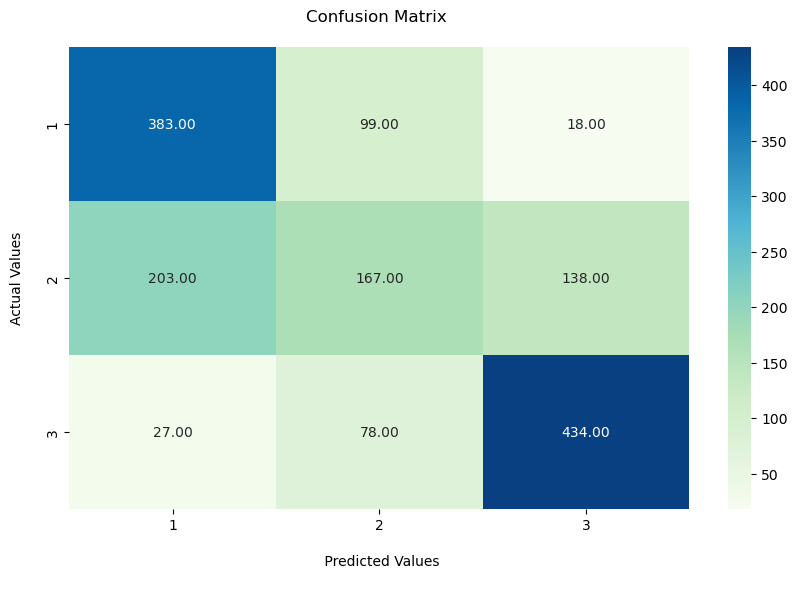



AUC for each class:
AUC for Class  1 :  0.8766017191977077
AUC for Class  2 :  0.5241089630398703
AUC for Class  3 :  0.9069687398769032


Figure:


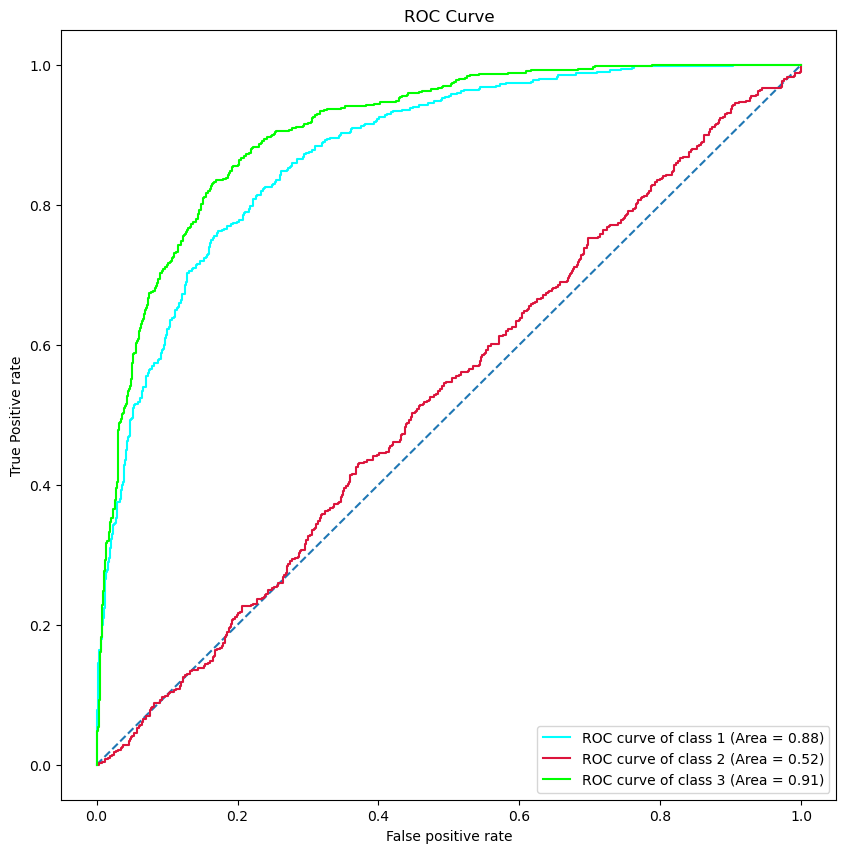

In [19]:
from sklearn import preprocessing, linear_model, svm
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
import seaborn as sns

selected_cols = ['yr', 'mnth', 'hr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed']
x = bikes[selected_cols].values
x_train, x_test = x[selection == 'train',:], x[selection == 'test',:]

multi_ovr_estimator = linear_model.LogisticRegression(solver='lbfgs',multi_class='ovr')
multi_ovr_estimator.fit(x_train, y_train)
y_ovr_predict = multi_ovr_estimator.predict(x_test)
print("Accuracy is : {}".format(accuracy_score(y_test, y_ovr_predict)))

print("\n\nConfusion matrix:")
cm = confusion_matrix(y_test, y_ovr_predict)
plt.figure(figsize=(10,6))
fx=sns.heatmap(cm, annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
label = multi_ovr_estimator.classes_
fx.xaxis.set_ticklabels(label)
fx.yaxis.set_ticklabels(label)
plt.show()

y_for_roc = label_binarize(y, classes=[1,2,3])
n_classes = y_for_roc.shape[1]
y_roc_train, y_roc_test = y_for_roc[selection == 'train'], y_for_roc[selection == 'test']
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True, random_state = 0))
y_score = classifier.fit(x_train, y_roc_train).decision_function(x_test)

print("\n\nAUC for each class:")
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_roc_test[:, i], y_score[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    print ("AUC for Class ",i+1,": ", roc_auc[i])

print("\n\nFigure:")    
plt.figure(figsize = (10, 10))    
plt.plot([0, 1], [0, 1], linestyle='--')

colors = (['aqua', 'crimson', 'lime'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=colors[i],
             label='ROC curve of class {0} (Area = {1:0.2f})'
             ''.format(i+1, roc_auc[i]))    

plt.xlabel('False positive rate')
plt.ylabel('True Positive rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

Accuracy of logistic regression classifier with C:0.001 on test set: 0.5895281189
Accuracy of logistic regression classifier with C:0.01 on test set: 0.5817711700
Accuracy of logistic regression classifier with C:0.1 on test set: 0.6186166774
Accuracy of logistic regression classifier with C:1 on test set: 0.6502908856
Accuracy of logistic regression classifier with C:10 on test set: 0.6418875242
Accuracy of logistic regression classifier with C:100 on test set: 0.6347769877
Accuracy of logistic regression classifier with C:1000 on test set: 0.6425339367
Accuracy of logistic regression classifier with C:10000 on test set: 0.6399482870
Accuracy of logistic regression classifier with C:100000 on test set: 0.6380090498
Accuracy of logistic regression classifier with C:1000000 on test set: 0.6418875242


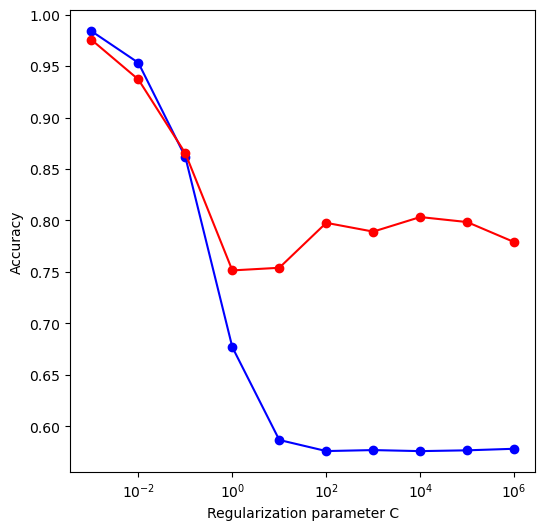

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, log_loss
from sklearn.linear_model import LogisticRegression

import math
num_C = 10
C = [1.0] * num_C
for i in range(num_C):
    C[i] = pow(10, i-3)
logit = [None] * num_C
inv_log_likelihood_train = [0.0] * num_C
inv_log_likelihood_test = [0.0] * num_C

for i in range(num_C):
    logreg_multi = LogisticRegression(C=C[i], solver='lbfgs', multi_class='multinomial')
    logreg_multi.fit(x_train, y_train)
    print('Accuracy of logistic regression classifier with C:{} on test set: {:.10f}'.format(C[i],logreg_multi.score(x_test, y_test)))
    
    y_train_predict = logreg_multi.predict(x_train)
    y_train_predict_proba = logreg_multi.predict_proba(x_train)
    
    y_test_predict = logreg_multi.predict(x_test)
    y_test_predict_proba = logreg_multi.predict_proba(x_test)
    
    inv_log_likelihood_train[i] = log_loss(y_train, y_train_predict_proba) 
    inv_log_likelihood_test[i] = log_loss(y_test, y_test_predict_proba)
    
plt.figure(figsize = (6, 6))
plt.xscale('log')
plt.plot(C, inv_log_likelihood_train, 'bo-', C, inv_log_likelihood_test, 'ro-')
plt.xlabel('Regularization parameter C')
plt.ylabel('Accuracy')
plt.show()